# Advertising Logistic Regression Project 

***By: Alex Mason*** 

Hello All, and welcome to this Notebook! The goal of this notebook will be to determine if a user has actually clicked on an advertisement on a website. After we examine the data, we will then use a logistic regression model to help predict whether or not users will click on an ad based off the features pertaining to that user. 

Lets start by importing some necessary libraries we will need throughout this notebook: 

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [78]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [79]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Importing the Data

Now we will be importing the user advertising data. The file we will be importing is titled: "Advertising.csv". We will create a dataframe in python for it and examine the first few rows as well as data types and column specified data as well.

In [11]:
advertising = pd.read_csv("Advertising.csv") # Read in csv file as dataframe
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


From here we can note that we will mainly be dealing with floating point values and interger values. But, we should note some important key characteristics about our data and what each columns data represents for our analysis: 

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad 

Now lets check out the head of our dataframe:

In [12]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Lets also look at some basic statistic measurements such as our mean, maximum value in each column and our quartiles as well. 

In [13]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


From here, in our dataset we note that about 48% of the users in this set are male and 52% are females so fairly diverse in terms of our users. We also have a very diverse mix of users ages ranging from 19yrs to 61yrs so we could potentially look at clusters of age groups as well later on or in another project. Okay very useful information so far! Lets move onto our exploratory data analysis.

## Exploratory Data Analysis

Lets start by creating a histogram of the "Age" column and get our totals for each age group:

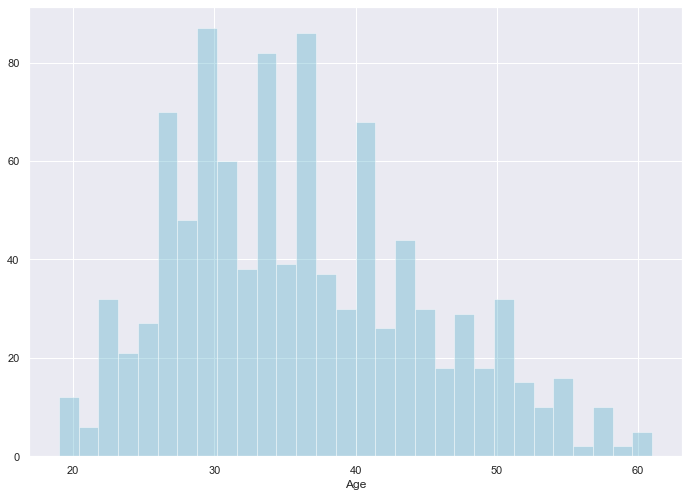

In [50]:
x = advertising['Age']
Histo = sns.distplot(x, kde=False, bins=30, color='c')

Very diverse distribution. Great! Lets plot a jointplot and compare Avg vs Area Income. 

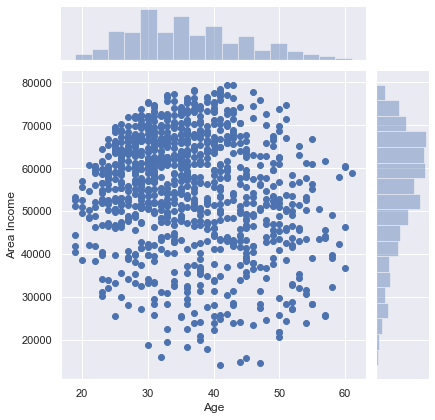

In [53]:
Age_AreaInc = sns.jointplot(x="Age", y="Area Income", data=advertising)

Once again, very diverse and a large range of income all over. We'll now just observe some other interesting comparisons in our dataset.

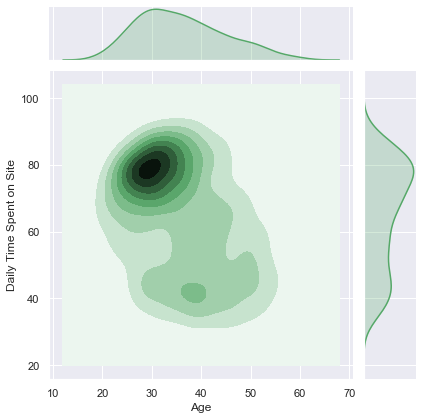

In [70]:
TimeSpentVsAge = sns.jointplot(x="Age", y="Daily Time Spent on Site", data=advertising, kind="kde", color='g')

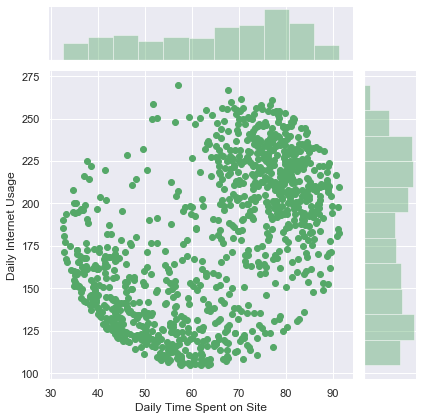

In [71]:
SiteVsUsage = sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=advertising, color='g')

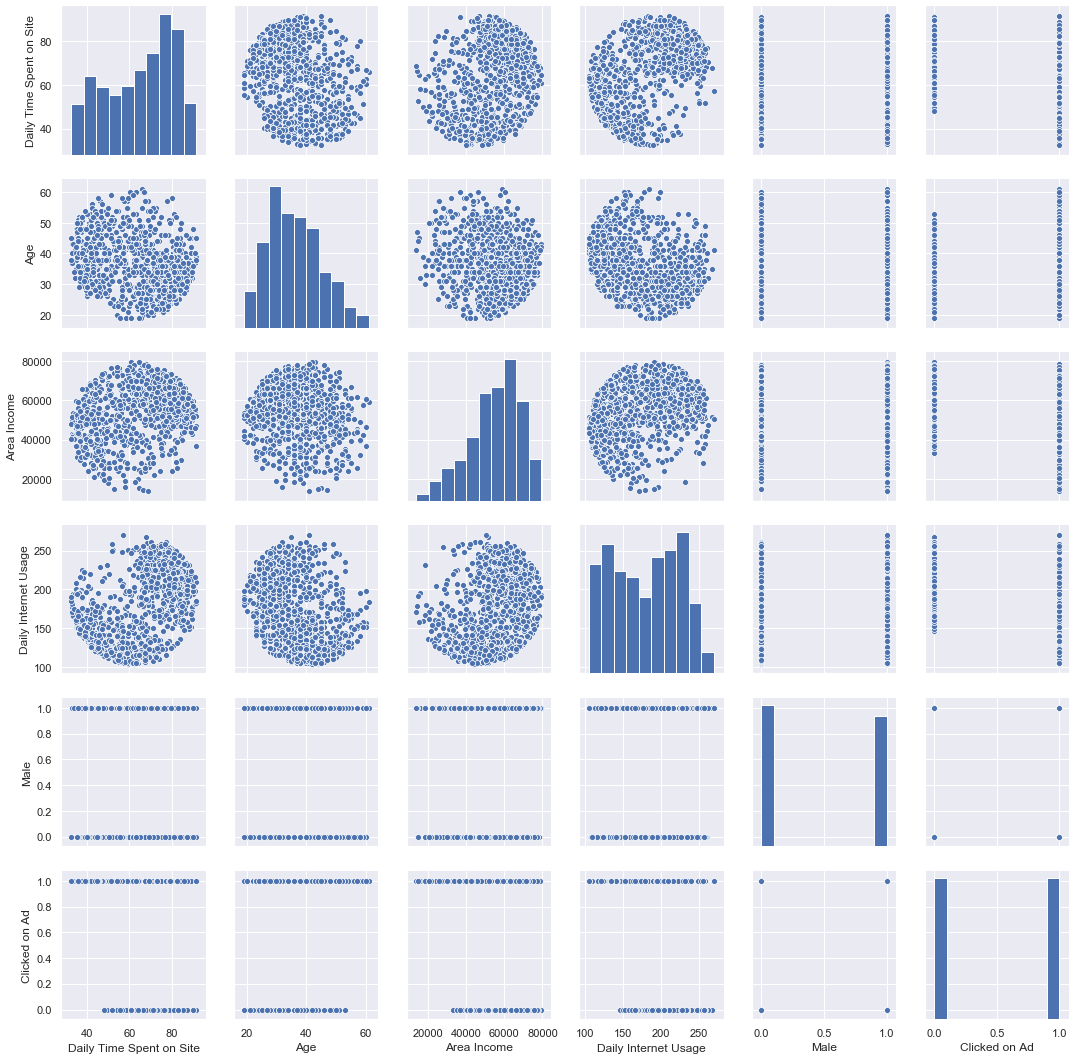

In [72]:
PairPlt = sns.pairplot(data = advertising)

## Logistic Regression Train Test Split

Now it is time to train test split our data. Followed by training our model!
Lets find out if we can determine if a user has clicked on the advertising based on their daily internet usage, whether they are male or female and their daily time spent on the website:

In [74]:
y = advertising['Clicked on Ad']
X = advertising[['Daily Internet Usage', 'Male', 'Daily Time Spent on Site']]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [80]:
logR = LogisticRegression()
logR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
predict = logR.predict(X_test)

## Classification Report

Now that we've completed our train test split and we've trained our model, we can now look at sklearn's classification report to view how well our model worked on our test set used the measurements of: Precision, Recall, The F1-Score and Support:

In [83]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       157
           1       0.98      0.92      0.95       143

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Awesome! Our model predicted very well with a strong macro average and a nice weighted average as well! Now we could continue to use to model for future predictions on whether or not customers will click on a site advertisement or not.

# Thank you for checking out this notebook! I hope you have a fantastic day! 